In [ ]:
Rsfi
/content/drive/MyDrive/DukeDatathon_2025_Team3/Rafi/AnalysisResults/final_prepared_cohort_with_survival.csv'

In [ ]:
# prompt: please load in this file from my google drivre and put into a pandas df ; make sure to mount google drive properly /content/drive/MyDrive/DukeDatathon_2025_Team3/Rafi/AnalysisResults/final_prepared_cohort_with_survival.csv'

from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Specify the file path
file_path = '/content/drive/MyDrive/DukeDatathon_2025_Team3/Rafi/AnalysisResults/final_prepared_cohort_with_survival.csv'

# Load the CSV file into a pandas DataFrame
try:
  df = pd.read_csv(file_path)
  print("File loaded successfully.")
  # You can now work with the DataFrame 'df'
  # For example, to display the first 5 rows:
  print(df.head())

except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except pd.errors.ParserError:
  print(f"Error: Could not parse the file at {file_path}. Check the file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")


Mounted at /content/drive
File loaded successfully.
   subject_id   hadm_id   stay_id               intime            deathtime  \
0    10001884  26184834  37510196  2131-01-11 04:20:05  2131-01-20 05:15:00   
1    10002013  23581541  39060235  2160-05-18 10:00:53                  NaN   
2    10002155  20345487  32358465  2131-03-09 21:33:00  2131-03-10 21:53:00   
3    10002155  23822395  33685454  2129-08-04 12:45:00                  NaN   
4    10002155  28994087  31090461  2130-09-24 00:50:00                  NaN   

   hospital_expire_flag  sofa  charlson_comorbidity_index  age gender  \
0                     1     8                           5   77      F   
1                     0     4                           7   57      F   
2                     1     9                          10   83      F   
3                     0     2                          10   81      F   
4                     0     5                          10   82      F   

                ethnicity language

In [20]:
df['ethnicity_grouped'] = df['ethnicity'].map({
    'WHITE': 'White',
    'WHITE - OTHER EUROPEAN': 'White',
    'WHITE - RUSSIAN': 'White',
    'BLACK/AFRICAN AMERICAN': 'Black',
    'ASIAN': 'Asian',
    'ASIAN - CHINESE': 'Asian',
    'HISPANIC/LATINO - PUERTO RICAN': 'Other',
    'OTHER': 'Other',
    'UNKNOWN': 'Other',
    'UNABLE TO OBTAIN': 'Other'
})

In [ ]:
import numpy as np
# Define the bins and labels
bins = [0, 49, 64, 79, np.inf]
labels = ['<=49', '50-64', '65-79', '80+']

# Create a new column for age groups
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

In [ ]:
df.columns

Index(['subject_id', 'hadm_id', 'stay_id', 'intime', 'deathtime',
       'hospital_expire_flag', 'sofa', 'charlson_comorbidity_index', 'age',
       'gender', 'ethnicity', 'language', 'insurance', 'over_24hr', 'dod',
       'mortality_30day', 'duration_30day', 'ethnicity_grouped', 'age_group'],
      dtype='object')

In [24]:
# prompt: create a version of df where other ethnicity_grtouped is dropped

# Filter out rows where ethnicity_grouped is 'Other'
df_filtered = df[df['ethnicity_grouped'] != 'Other']


ethnicity_grouped     Asian               Black               Other            \
gender                    F         M         F         M         F         M   
age_group                                                                       
<=49               5.246377  5.800000  5.454861  5.936975  6.239006  5.995252   
50-64              5.307692  6.434783  6.284038  6.644105  6.568056  6.734139   
65-79              6.694737  6.310345  6.077876  6.234867  6.033298  6.467311   
80+                5.750000  6.619469  6.024390  6.127273  6.122862  6.607143   

ethnicity_grouped     White            
gender                    F         M  
age_group                              
<=49               5.423232  5.724324  
50-64              5.667705  6.094281  
65-79              5.655204  5.935151  
80+                5.340918  6.007863

<ipython-input-25-299bb6a69349>:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtered.pivot_table(


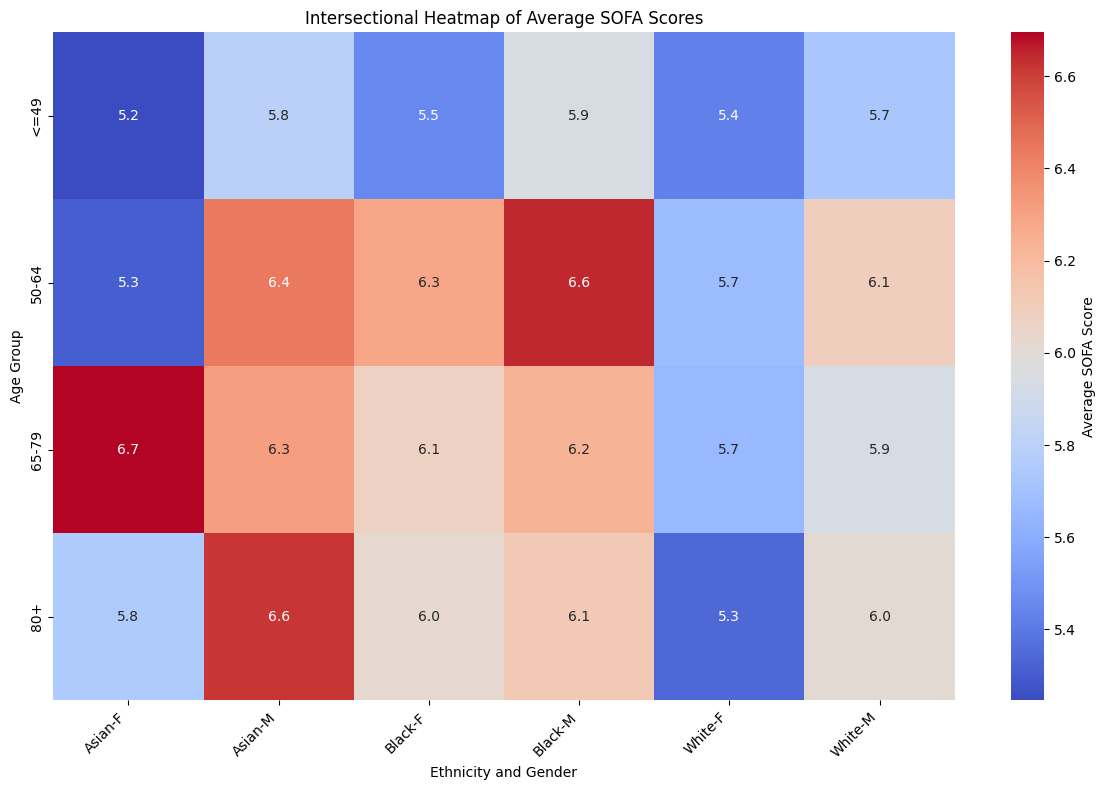

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Create a pivot table for the intersection of age_group, ethnicity_grouped, and gender
# Assuming df is your dataframe and 'sofa_score' is the variable of interest
pivot_table = df_filtered.pivot_table(
    values='sofa',
    index='age_group',
    columns=['ethnicity_grouped', 'gender'],
    aggfunc='mean'
)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'Average SOFA Score'})
plt.title('Intersectional Heatmap of Average SOFA Scores')
plt.ylabel('Age Group')
plt.xlabel('Ethnicity and Gender')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-35-20d46c815130>:26: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtered.pivot_table(


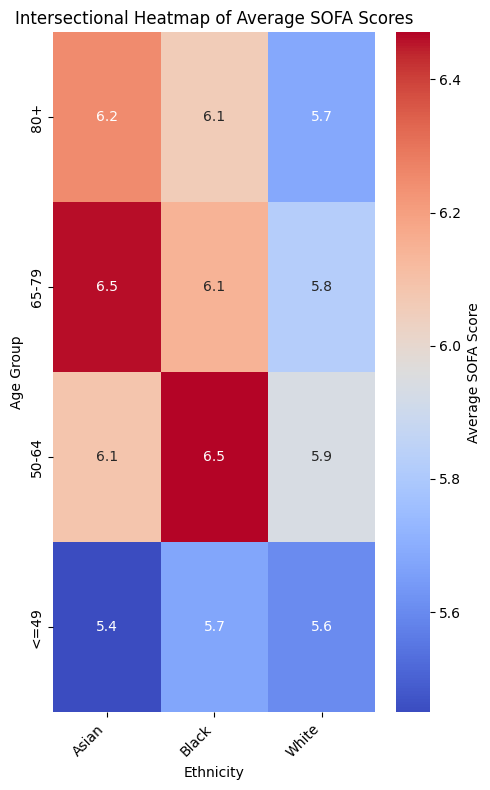

In [35]:
# prompt: This code but dont split on gender and make ordering of age reverse:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# # Example: Create a pivot table for the intersection of age_group, ethnicity_grouped, and gender
# # Assuming df is your dataframe and 'sofa_score' is the variable of interest
# pivot_table = df_filtered.pivot_table(
#     values='sofa',
#     index='age_group',
#     columns=['ethnicity_grouped', 'gender'],
#     aggfunc='mean'
# )
# # Plot the heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'Average SOFA Score'})
# plt.title('Intersectional Heatmap of Average SOFA Scores')
# plt.ylabel('Age Group')
# plt.xlabel('Ethnicity and Gender')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

import matplotlib.pyplot as plt
# Example: Create a pivot table for the intersection of age_group, ethnicity_grouped
# Assuming df is your dataframe and 'sofa_score' is the variable of interest
pivot_table = df_filtered.pivot_table(
    values='sofa',
    index='age_group',
    columns='ethnicity_grouped',
    aggfunc='mean'
)

# Sort the index (age_group) in reverse order
pivot_table = pivot_table.sort_index(ascending=False)

# Plot the heatmap
plt.figure(figsize=(5, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'Average SOFA Score'})
plt.title('Intersectional Heatmap of Average SOFA Scores')
plt.ylabel('Age Group')
plt.xlabel('Ethnicity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<ipython-input-34-5f5a88d502f1>:26: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtered.pivot_table(


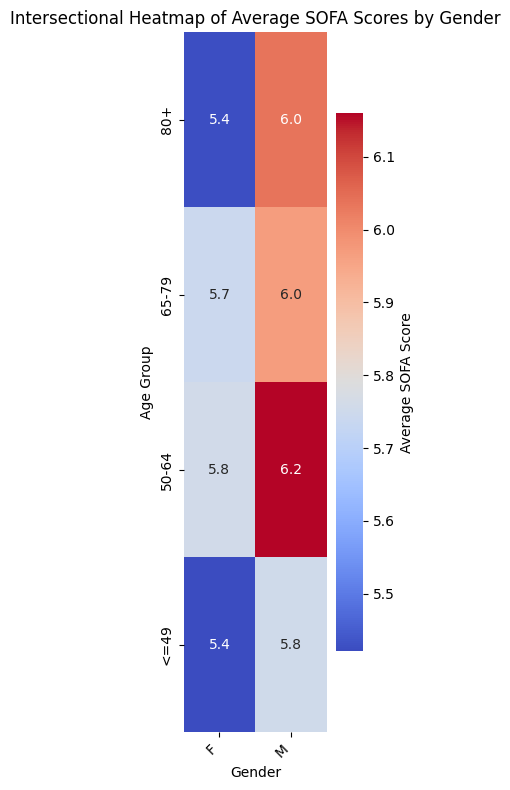

In [34]:
# prompt: this code but doon gender instead of race
# import matplotlib.pyplot as plt
# # Example: Create a pivot table for the intersection of age_group, ethnicity_grouped
# # Assuming df is your dataframe and 'sofa_score' is the variable of interest
# pivot_table = df_filtered.pivot_table(
#     values='sofa',
#     index='age_group',
#     columns='ethnicity_grouped',
#     aggfunc='mean'
# )
# # Sort the index (age_group) in reverse order
# pivot_table = pivot_table.sort_index(ascending=False)
# # Plot the heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'Average SOFA Score'})
# plt.title('Intersectional Heatmap of Average SOFA Scores')
# plt.ylabel('Age Group')
# plt.xlabel('Ethnicity')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

import matplotlib.pyplot as plt
# Example: Create a pivot table for the intersection of age_group, gender
# Assuming df is your dataframe and 'sofa_score' is the variable of interest
pivot_table = df_filtered.pivot_table(
    values='sofa',
    index='age_group',
    columns='gender',
    aggfunc='mean'
)

# Sort the index (age_group) in reverse order
pivot_table = pivot_table.sort_index(ascending=False)

# Plot the heatmap
plt.figure(figsize=(3, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'Average SOFA Score'})
plt.title('Intersectional Heatmap of Average SOFA Scores by Gender')
plt.ylabel('Age Group')
plt.xlabel('Gender')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
int_file_path = '/content/drive/MyDrive/DukeDatathon_2025_Team3/Rafi/SecondAnalysis/intersectional_stats_full.csv'

df_int = pd.read_csv(int_file_path)

In [ ]:
df_int.age_group.unique()

array(['<=49', '80+', '65-79', '50-64'], dtype=object)

In [ ]:
# get the dist of sofa score sfor each gender

# dist = df.groupby('gender')['sofa'].value_counts(normalize=True)
# print(dist)

# get the mean sofa score and sdev for each gender
mean_std = df.groupby('gender')['sofa'].agg(['mean', 'std'])
print(mean_std)



            mean       std
gender                    
F       5.741835  3.426649
M       6.115146  3.539777


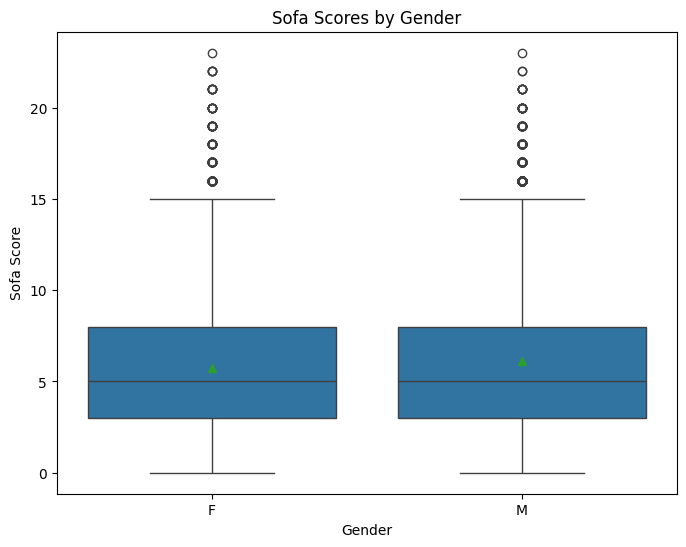

In [ ]:
# prompt: can you create a box plot for the sofa column using gender as the variable split by M and F

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it contains columns 'sofa' and 'gender'
# Check if the columns exist
if 'sofa' in df.columns and 'gender' in df.columns:
    # Create the box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='gender', y='sofa', data=df, showmeans=True)
    plt.title('Sofa Scores by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Sofa Score')
    plt.show()
else:
    print("Error: 'sofa' or 'gender' column not found in the DataFrame.")


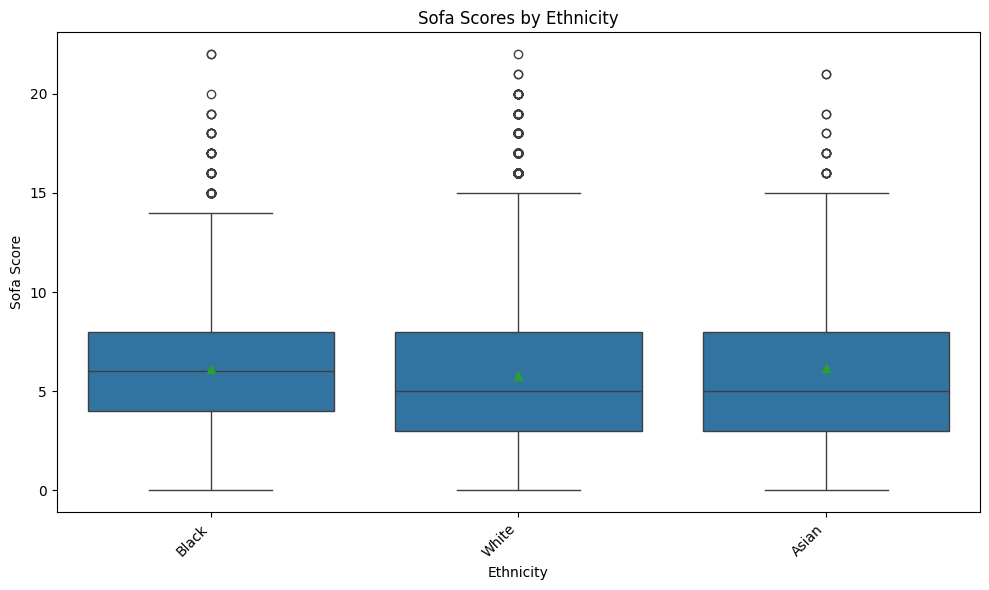

In [36]:
# prompt: can you create a box plot for the sofa column and ethnicity

# Assuming 'df' is your DataFrame and it contains columns 'sofa' and 'ethnicity'
# Check if the columns exist
if 'sofa' in df.columns and 'ethnicity' in df.columns:
    # Create the box plot
    plt.figure(figsize=(10, 6))  # Adjust figure size if needed
    sns.boxplot(x='ethnicity_grouped', y='sofa', data=df_filtered, showmeans=True)
    plt.title('Sofa Scores by Ethnicity')
    plt.xlabel('Ethnicity')
    plt.ylabel('Sofa Score')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability if needed
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()
else:
    print("Error: 'sofa' or 'ethnicity' column not found in the DataFrame.")


In [ ]:
# prompt: code to list the different variables in the dataframe

# Display the list of columns in the DataFrame
df.columns


Index(['subject_id', 'hadm_id', 'stay_id', 'intime', 'deathtime',
       'hospital_expire_flag', 'sofa', 'charlson_comorbidity_index', 'age',
       'gender', 'ethnicity', 'language', 'insurance', 'over_24hr', 'dod',
       'mortality_30day', 'duration_30day', 'ethnicity_grouped', 'age_group'],
      dtype='object')

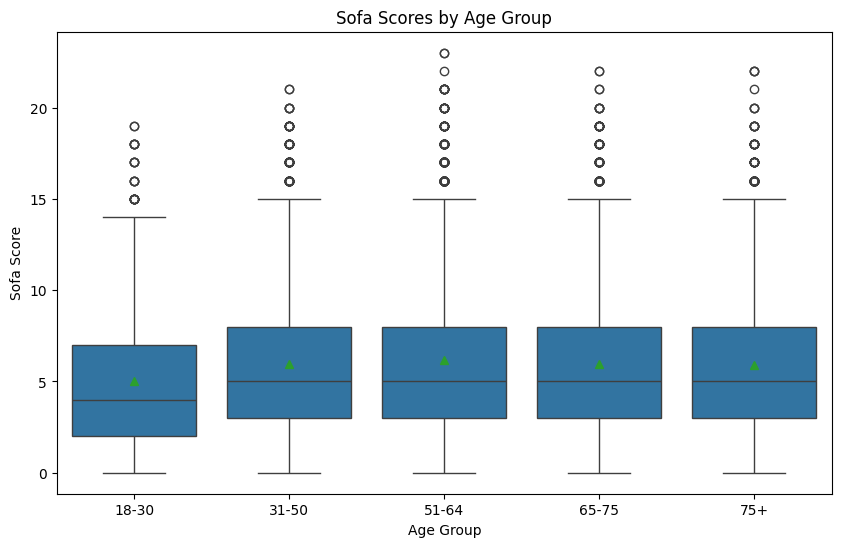

In [ ]:
# prompt: boxplot for sofa score and age where age is stratified into the ranges 18 to 30, 31 to 50, 51 to64, 65 to 75, and 75 and above

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it contains columns 'sofa' and 'age'
# Create age groups
bins = [18, 30, 50, 64, 75, float('inf')]
labels = ['18-30', '31-50', '51-64', '65-75', '75+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Check if the columns exist
if 'sofa' in df.columns and 'age_group' in df.columns:
    # Create the box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='age_group', y='sofa', data=df, showmeans=True)
    plt.title('Sofa Scores by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Sofa Score')
    plt.show()
else:
    print("Error: 'sofa' or 'age' column not found in the DataFrame.")


<ipython-input-16-b93d479686e5>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(['age_group', 'ethnicity']).size().unstack()


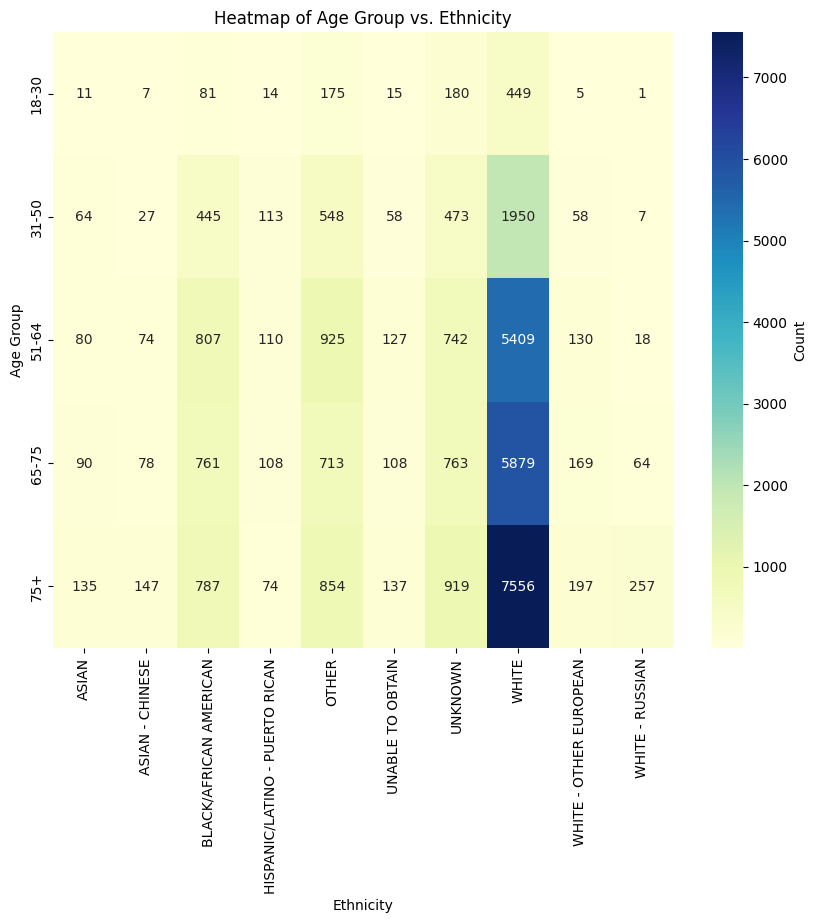

In [ ]:
# prompt: generate a heatmap for age groups and ethnicity

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it contains columns 'age_group' and 'ethnicity'
# Check if the columns exist
if 'age_group' in df.columns and 'ethnicity' in df.columns:
    # Create the heatmap
    plt.figure(figsize=(10, 8))  # Adjust figure size as needed

    # Calculate the counts for the heatmap
    heatmap_data = df.groupby(['age_group', 'ethnicity']).size().unstack()

    sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Count'})
    plt.title('Heatmap of Age Group vs. Ethnicity')
    plt.xlabel('Ethnicity')
    plt.ylabel('Age Group')
    plt.show()

else:
    print("Error: 'age_group' or 'ethnicity' column not found in the DataFrame.")


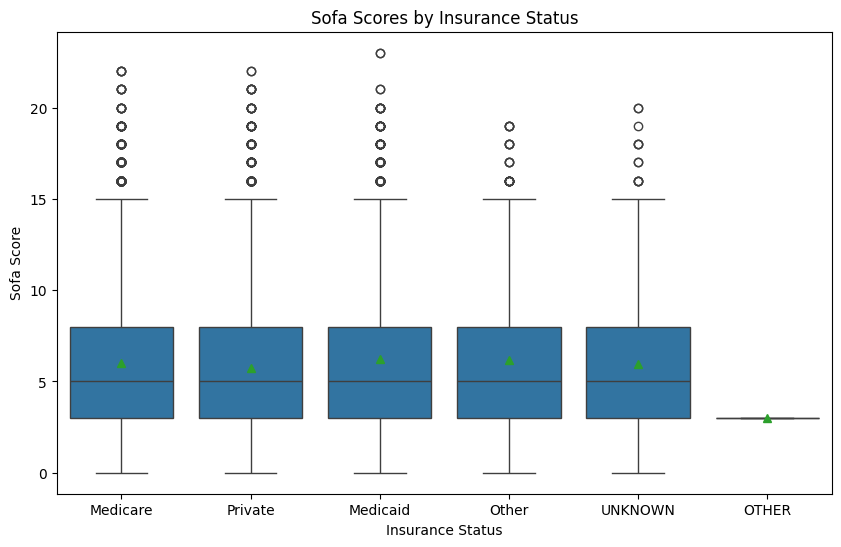

In [ ]:
# prompt: generate a box plot for sofa and insurance

# Assuming 'df' is your DataFrame and it contains columns 'sofa' and 'insurance_status'
# Check if the columns exist
if 'sofa' in df.columns and 'insurance' in df.columns:
    # Create the box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='insurance', y='sofa', data=df, showmeans=True)
    plt.title('Sofa Scores by Insurance Status')
    plt.xlabel('Insurance Status')
    plt.ylabel('Sofa Score')
    plt.show()
else:
    print("Error: 'sofa' or 'insurance' column not found in the DataFrame.")


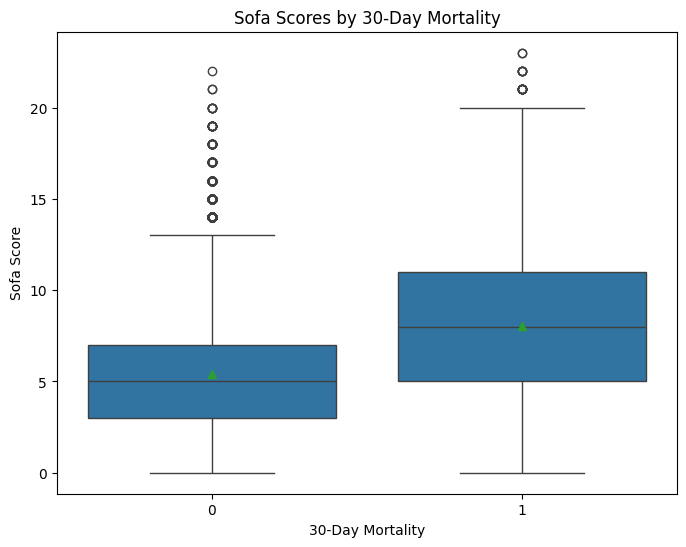

In [ ]:
# prompt: box plot for sofa and mortality_30day

# Assuming 'df' is your DataFrame and it contains columns 'sofa' and 'mortality_30day'
# Check if the columns exist
if 'sofa' in df.columns and 'mortality_30day' in df.columns:
    # Create the box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='mortality_30day', y='sofa', data=df, showmeans=True)
    plt.title('Sofa Scores by 30-Day Mortality')
    plt.xlabel('30-Day Mortality')
    plt.ylabel('Sofa Score')
    plt.show()
else:
    print("Error: 'sofa' or 'mortality_30day' column not found in the DataFrame.")


In [ ]:
df.columns

Index(['subject_id', 'hadm_id', 'stay_id', 'intime', 'deathtime',
       'hospital_expire_flag', 'sofa', 'charlson_comorbidity_index', 'age',
       'gender', 'ethnicity', 'language', 'insurance', 'over_24hr', 'dod',
       'mortality_30day', 'duration_30day', 'ethnicity_grouped', 'age_group'],
      dtype='object')

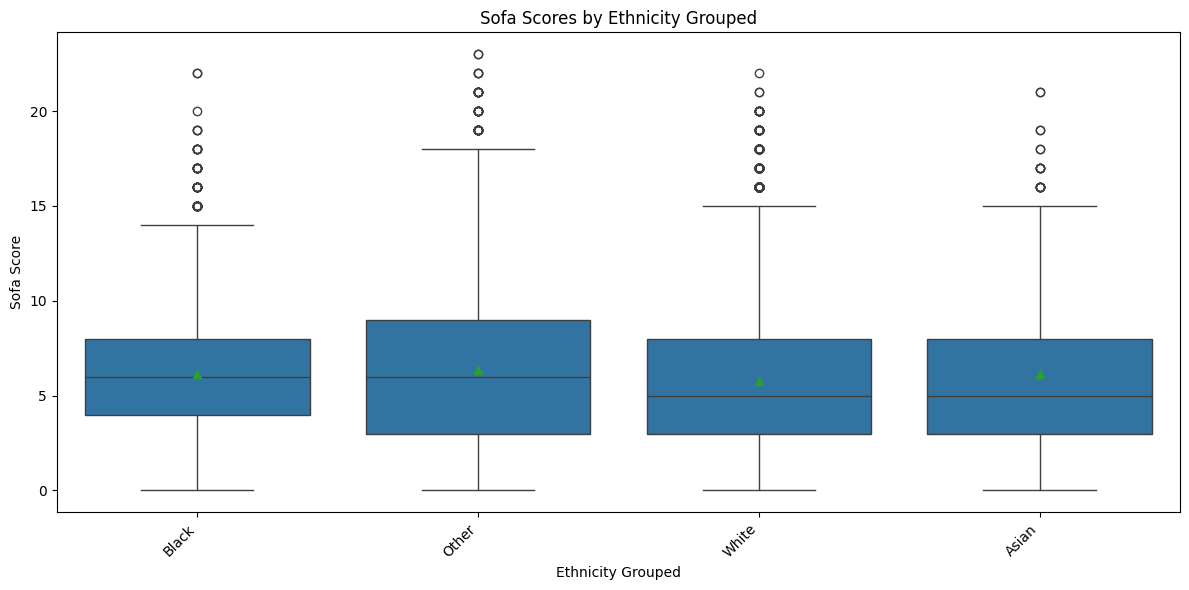

In [ ]:
# prompt: box plot for sofa and ethnicity_grouped

# Assuming 'df' is your DataFrame and it contains columns 'sofa', 'ethnicity_grouped'
# Check if the columns exist
if 'sofa' in df.columns and 'ethnicity_grouped' in df.columns:
    # Create the box plot
    plt.figure(figsize=(12, 6))  # Adjust figure size if needed
    sns.boxplot(x='ethnicity_grouped', y='sofa', data=df, showmeans=True)
    plt.title('Sofa Scores by Ethnicity Grouped')
    plt.xlabel('Ethnicity Grouped')
    plt.ylabel('Sofa Score')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability if needed
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()
else:
    print("Error: 'sofa' or 'ethnicity_grouped' column not found in the DataFrame.")
